In [37]:
import pandas as pd
import numpy as np


pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

# Import the profile and inspections data

In [6]:
profile = pd.read_csv(r"../data_output/webscrape_LTCgen_profile.csv")
profile.info()
profile.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 16 columns):
name                    651 non-null object
address                 651 non-null object
city_and_postal_code    651 non-null object
LHIN                    649 non-null object
licensee                649 non-null object
management              82 non-null object
home_type               643 non-null object
beds                    649 non-null object
short_stay              649 non-null object
residents_council       649 non-null object
family_council          649 non-null object
accreditation           649 non-null object
additional_info         29 non-null object
city                    651 non-null object
postal_code             651 non-null object
number_of_beds          649 non-null float64
dtypes: float64(1), object(15)
memory usage: 81.5+ KB


,name,address,city_and_postal_code,LHIN,licensee,management,home_type,beds,short_stay,residents_council,family_council,accreditation,additional_info,city,postal_code,number_of_beds
0,AFTON PARK PLACE LONG TERM CARE COMMUNITY,1200 Afton Drive,"Sarnia, N7S6L6",Erie St. Clair,S & R Nursing Homes Ltd.,NaN,For-Profit,Home with approximately 128 beds,No,Yes,Yes,Yes,NaN,Sarnia,N7S6L6,128.0
1,"ALBRIGHT GARDENS HOMES, INCORPORATED",5050 Hillside Drive,"Beamsville, L0R1B2",Hamilton Niagara Haldimand Brant (Hnhb),"Albright Gardens Homes, Incorporated",NaN,Non-Profit,Home with approximately 231 beds,No,Yes,Yes,No,NaN,Beamsville,L0R1B2,231.0
2,ALEXANDER PLACE,329 Parkside Drive P. O. Box 50,"Waterdown, L0R2H0",Hamilton Niagara Haldimand Brant (Hnhb),Waterdown Long Term Care Centre Inc.,NaN,For-Profit,Home with approximately 128 beds,Yes,Yes,Yes,Yes,NaN,Waterdown,L0R2H0,128.0
3,ALGOMA DISTRICT HOMES FOR THE AGED (ALGOMA MANOR),135 Dawson Street,"Thessalon, P0R1L0",North East,Board Of Management For The District Of Algoma,NaN,NaN,Home with approximately 108 beds,Yes,Yes,Yes,No,Home Closed on 11/01/2011,Thessalon,P0R1L0,108.0
4,ALGOMA MANOR NURSING HOME,145 Dawson Street,"Thessalon, P0R1L0",North East,Algoma Manor Nursing Home,NaN,NaN,Home with approximately 96 beds,Yes,Yes,Yes,Yes,NaN,Thessalon,P0R1L0,96.0


In [7]:
inspect = pd.read_csv(r"../data_output/webscrape_LTCgen_inspections.csv")
inspect.info()
inspect.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24834 entries, 0 to 24833
Data columns (total 3 columns):
name                24834 non-null object
inspection_types    24834 non-null object
inspection_dates    24834 non-null object
dtypes: object(3)
memory usage: 582.1+ KB


,name,inspection_types,inspection_dates
0,AFTON PARK PLACE LONG TERM CARE COMMUNITY,Complaints Inspection,2020-09-10
1,AFTON PARK PLACE LONG TERM CARE COMMUNITY,Critical Incident Inspection with Order(s) of...,2020-09-10
2,AFTON PARK PLACE LONG TERM CARE COMMUNITY,Complaints Inspection,2020-06-12
3,AFTON PARK PLACE LONG TERM CARE COMMUNITY,Complaints Inspection,2020-01-17
4,AFTON PARK PLACE LONG TERM CARE COMMUNITY,Complaints Inspection,2019-11-27


In [9]:
# Return LTC home names that do not match 
orig = set(profile['name'])
inspec = set(inspect['name'])
def returnNotMatches(a, b):
    return [[x for x in a if x not in b], [x for x in b if x not in a]]
returnNotMatches(orig, inspec)

[["ST. JOSEPH'S MOTHER HOUSE (MARTHA WING)",
  'MARIANHILL - MARGUERITE CENTRE',
  'NORTHUMBERLAND HILLS HOSPITAL'],
 []]

### Manual review of 3 LTC homes that were not represented in the inspections data and tag for removal
- ST. JOSEPH'S MOTHER HOUSE (MARTHA WING), no inspections or profile information
- NORTHUMBERLAND HILLS HOSPITAL: No inspections, closed 2012
- MARIANHILL - MARGUERITE CENTRE: No inspections, closed 2012

## Clean inspections data

In [52]:
# list 29 different inspection types
inspect['inspection_types'].value_counts()

# for each home identify date of first and last inspections
min_dates = inspect.groupby(['name'])['inspection_dates'].min()
max_dates = inspect.groupby(['name'])['inspection_dates'].max()
inspect['first_inspection_date'] = inspect.apply(lambda row: min_dates.loc[row['name']], axis=1)
inspect['last_inspection_date'] = inspect.apply(lambda row: max_dates.loc[row['name']], axis=1)
inspect.head()


,name,inspection_types,inspection_dates,first_inspection_date,last_inspection_date
0,AFTON PARK PLACE LONG TERM CARE COMMUNITY,Complaints Inspection,2020-09-10,2010-09-16,2020-09-10
1,AFTON PARK PLACE LONG TERM CARE COMMUNITY,Critical Incident Inspection with Order(s) of the Inspector,2020-09-10,2010-09-16,2020-09-10
2,AFTON PARK PLACE LONG TERM CARE COMMUNITY,Complaints Inspection,2020-06-12,2010-09-16,2020-09-10
3,AFTON PARK PLACE LONG TERM CARE COMMUNITY,Complaints Inspection,2020-01-17,2010-09-16,2020-09-10
4,AFTON PARK PLACE LONG TERM CARE COMMUNITY,Complaints Inspection,2019-11-27,2010-09-16,2020-09-10


In [54]:
# filter for total inspections through to Jan 2020
df_total = inspect[(inspect['inspection_dates'] < '2020-01-01')]

# create a df with total number of inspections
df_total = df_total.groupby(['name']).size().to_frame('total_inspections').reset_index()
df_total.info()
df_total.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 648 entries, 0 to 647
Data columns (total 2 columns):
name                 648 non-null object
total_inspections    648 non-null int64
dtypes: int64(1), object(1)
memory usage: 10.2+ KB


,name,total_inspections
0,AFTON PARK PLACE LONG TERM CARE COMMUNITY,66
1,"ALBRIGHT GARDENS HOMES, INCORPORATED",36
2,ALEXANDER PLACE,27
3,ALGOMA DISTRICT HOMES FOR THE AGED (ALGOMA MANOR),5
4,ALGOMA MANOR NURSING HOME,20


In [55]:
# filter for inspections in last 5y - Jan 2015 to Jan 2020
df_5y = inspect[(inspect['inspection_dates'] > '2014-12-31') & (inspect['inspection_dates'] < '2020-01-01')]

# create df with number of inspections in the last 5 years
df_5y = df_5y.groupby(['name']).size().to_frame('5y_inspections')
df_5y.info()
df_5y.head()

<class 'pandas.core.frame.DataFrame'>
Index: 632 entries, AFTON PARK PLACE LONG TERM CARE COMMUNITY to ÉLISABETH-BRUYÈRE RESIDENCE
Data columns (total 1 columns):
5y_inspections    632 non-null int64
dtypes: int64(1)
memory usage: 9.9+ KB


,5y_inspections
name,
AFTON PARK PLACE LONG TERM CARE COMMUNITY,33
"ALBRIGHT GARDENS HOMES, INCORPORATED",22
ALEXANDER PLACE,16
ALGOMA MANOR NURSING HOME,11
ALGONQUIN NURSING HOME,13


In [56]:
# filter for inspections in last 2y - Jan 2018 to Jan 2020
df_2y = inspect[(inspect['inspection_dates'] > '2017-12-31') & (inspect['inspection_dates'] < '2020-01-01')]

# create df with number of inspections in the last 2 years
df_2y = df_2y.groupby(['name']).size().to_frame('2y_inspections')
df_2y.info()
df_2y.head()

<class 'pandas.core.frame.DataFrame'>
Index: 626 entries, AFTON PARK PLACE LONG TERM CARE COMMUNITY to ÉLISABETH-BRUYÈRE RESIDENCE
Data columns (total 1 columns):
2y_inspections    626 non-null int64
dtypes: int64(1)
memory usage: 9.8+ KB


,2y_inspections
name,
AFTON PARK PLACE LONG TERM CARE COMMUNITY,8
"ALBRIGHT GARDENS HOMES, INCORPORATED",12
ALEXANDER PLACE,7
ALGOMA MANOR NURSING HOME,4
ALGONQUIN NURSING HOME,4


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11eb4ccc0>]],
      dtype=object)

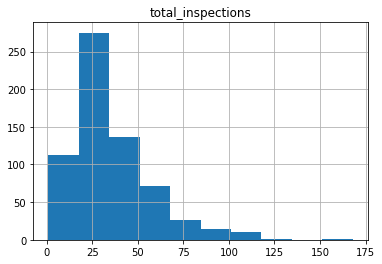

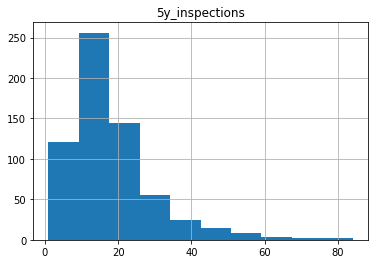

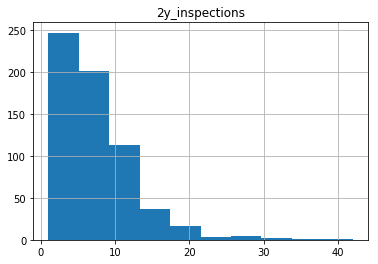

In [57]:
df_total.hist(column='total_inspections')
df_5y.hist(column='5y_inspections')
df_2y.hist(column='2y_inspections')

# # cut total inspections into quartiles and add a column with quartile ranges
# df_total['quartiles_total_range'] = pd.qcut(df_total['total_inspections'], q=4, precision=0)
# print(df_total['quartiles_total_range'].value_counts())

# # add column with quartile rank values
# df_total['quartiles_total_rank'] = pd.qcut(df_total['total_inspections'], q=4, labels = False, precision=0)

# df_total.head()

### Note that there are fewer homes with inspections in the last 5y/2y meaning that some homes have not been inspected in the last 2-5 years. Some homes may be closed. These have not yet been filtered out. 

- 648 homes with inspections
- 632 homes with 5 years of inspections
- 626 homes with 2 years of inspections

In [58]:
# Filter for inspections with the words "Complaints", "Critical Incident" and "Order(s)" 
df_complaints = inspect[inspect["inspection_types"].str.contains('Complaints', regex=False, na=False)]
df_critical = inspect[inspect["inspection_types"].str.contains('Critical Incident', regex=False, na=False)]
df_withOrders = inspect[inspect["inspection_types"].str.contains('Order(s)', regex=False, na=False)]

# Count the number of inspections containing the words "Compliants", "Critical Incident" and "Order(s)" for each home
df_complaints_total = df_complaints[(df_complaints['inspection_dates'] < '2020-01-01')]
df_complaints_total = df_complaints.groupby(['name']).size().to_frame('total_complaints').reset_index()

df_critical_total = df_critical[(df_critical['inspection_dates'] < '2020-01-01')]
df_critical_total = df_critical.groupby(['name']).size().to_frame('total_critical').reset_index()

df_withOrders_total = df_withOrders[(df_withOrders['inspection_dates'] < '2020-01-01')]
df_withOrders_total = df_withOrders.groupby(['name']).size().to_frame('total_withOrders').reset_index()

# Complaints, critical and withOrders in the last 5y
# df_complaints = inspect[inspect["inspection_types"].str.contains('Complaints', regex=False, na=False) ]
df_complaints_5y = df_complaints[(df_complaints['inspection_dates'] > '2014-12-31') & 
                                 (df_complaints['inspection_dates'] < '2020-01-01')]
df_complaints_5y = df_complaints_5y.groupby(['name']).size().to_frame('5y_complaints').reset_index()

# df_critical = inspect[inspect["inspection_types"].str.contains('Critical Incident', regex=False, na=False) ]
df_critical_5y = df_critical[(df_critical['inspection_dates'] > '2014-12-31') & 
                             (df_critical['inspection_dates'] < '2020-01-01')]
df_critical_5y = df_critical_5y.groupby(['name']).size().to_frame('5y_critical').reset_index()

# df_withOrders = inspect[inspect["inspection_types"].str.contains('Order(s)', regex=False, na=False) ]
df_withOrders_5y = df_withOrders[(df_withOrders['inspection_dates'] > '2014-12-31') & 
                                 (df_withOrders['inspection_dates'] < '2020-01-01')]
df_withOrders_5y = df_withOrders_5y.groupby(['name']).size().to_frame('5y_withOrders').reset_index()

# Complaints, critical and withOrders in the last 2y
# df_complaints = inspect[inspect["inspection_types"].str.contains('Complaints', regex=False, na=False) ]
df_complaints_2y = df_complaints[(df_complaints['inspection_dates'] > '2017-12-31') & 
                                 (df_complaints['inspection_dates'] < '2020-01-01')]
df_complaints_2y = df_complaints_2y.groupby(['name']).size().to_frame('2y_complaints').reset_index()

# df_critical = inspect[inspect["inspection_types"].str.contains('Critical Incident', regex=False, na=False) ]
df_critical_2y = df_critical[(df_critical['inspection_dates'] > '2017-12-31') & 
                             (df_critical['inspection_dates'] < '2020-01-01')]
df_critical_2y = df_critical_2y.groupby(['name']).size().to_frame('2y_critical').reset_index()

# df_withOrders = inspect[inspect["inspection_types"].str.contains('Order(s)', regex=False, na=False) ]
df_withOrders_2y = df_withOrders[(df_withOrders['inspection_dates'] > '2017-12-31') & 
                                 (df_withOrders['inspection_dates'] < '2020-01-01')]
df_withOrders_2y = df_withOrders_2y.groupby(['name']).size().to_frame('2y_withOrders').reset_index()


In [30]:
# # Inspect the multiple dataframes
# df_5y = df_5y.reset_index(); df_5y.info()
# df_2y = df_2y.reset_index(); df_2y.info()
# df_complaints_total.info() # 9243 complaints
# df_critical_total.info() # 7905 critical 
# df_withOrders_total.info() # 4305 orders
# df_complaints_5y.info() 
# df_critical_5y.info()
# df_withOrders_5y.info()
# df_complaints_2y.info()
# df_critical_2y.info()
# df_withOrders_2y.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 2 columns):
name              636 non-null object
total_critical    636 non-null int64
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


In [60]:
# create df with date of first and last inspections
df_first = inspect[['name', 'first_inspection_date', 'last_inspection_date']]
df_first.drop_duplicates(inplace=True)
df_first.info()
df_first.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 648 entries, 0 to 24805
Data columns (total 3 columns):
name                     648 non-null object
first_inspection_date    648 non-null object
last_inspection_date     648 non-null object
dtypes: object(3)
memory usage: 20.2+ KB


/Users/mds/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,name,first_inspection_date,last_inspection_date
0,AFTON PARK PLACE LONG TERM CARE COMMUNITY,2010-09-16,2020-09-10
70,"ALBRIGHT GARDENS HOMES, INCORPORATED",2010-11-03,2020-11-12
113,ALEXANDER PLACE,2010-08-17,2020-02-24
141,ALGOMA DISTRICT HOMES FOR THE AGED (ALGOMA MANOR),2011-05-09,2011-08-25
146,ALGOMA MANOR NURSING HOME,2012-02-16,2020-07-29


In [31]:
# Merge the dataframes on home name
from functools import reduce
list_inspections_dfs = [df_first, df_total, df_5y, df_2y, 
                        df_complaints_total, df_complaints_5y, df_complaints_2y, 
                        df_critical_total, df_critical_5y, df_critical_2y,
                        df_withOrders_total, df_withOrders_5y, df_withOrders_2y]

df_inspections = reduce(lambda x,y: pd.merge(x,y, on='name', how='outer'), list_inspections_dfs)
df_inspections.info()
df_inspections.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 648 entries, 0 to 647
Data columns (total 15 columns):
name                     648 non-null object
first_inspection_date    648 non-null object
total_inspections        648 non-null int64
index                    632 non-null float64
5y_inspections           632 non-null float64
2y_inspections           626 non-null float64
total_complaints         639 non-null float64
5y_complaints            586 non-null float64
2y_complaints            521 non-null float64
total_critical           636 non-null float64
5y_critical              618 non-null float64
2y_critical              604 non-null float64
total_withOrders         609 non-null float64
5y_withOrders            560 non-null float64
2y_withOrders            410 non-null float64
dtypes: float64(12), int64(1), object(2)
memory usage: 81.0+ KB


,name,first_inspection_date,total_inspections,index,5y_inspections,2y_inspections,total_complaints,5y_complaints,2y_complaints,total_critical,5y_critical,2y_critical,total_withOrders,5y_withOrders,2y_withOrders
0,AFTON PARK PLACE LONG TERM CARE COMMUNITY,2010-09-16,70,0.0,33.0,8.0,31.0,14.0,2.0,29.0,13.0,5.0,6.0,2.0,NaN
1,"ALBRIGHT GARDENS HOMES, INCORPORATED",2010-11-03,43,1.0,22.0,12.0,19.0,8.0,4.0,14.0,6.0,5.0,8.0,7.0,3.0
2,ALEXANDER PLACE,2010-08-17,28,2.0,16.0,7.0,11.0,5.0,2.0,8.0,5.0,2.0,4.0,4.0,2.0
3,ALGOMA DISTRICT HOMES FOR THE AGED (ALGOMA MANOR),2011-05-09,5,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN
4,ALGOMA MANOR NURSING HOME,2012-02-16,25,3.0,11.0,4.0,8.0,4.0,1.0,4.0,1.0,NaN,6.0,3.0,1.0


## Merge the inspections data with the profile data

In [38]:
# Merge the dfs
ltc_scrape = pd.merge(left=profile, right=df_inspections, how='left', left_on='name', right_on='name')

# Replace blank values with NaN
ltc_scrape = ltc_scrape.replace(r'^\s*$', np.nan, regex=True)

ltc_scrape.info()
ltc_scrape.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 651 entries, 0 to 650
Data columns (total 30 columns):
name                     651 non-null object
address                  651 non-null object
city_and_postal_code     651 non-null object
LHIN                     649 non-null object
licensee                 649 non-null object
management               82 non-null object
home_type                643 non-null object
beds                     649 non-null object
short_stay               649 non-null object
residents_council        649 non-null object
family_council           649 non-null object
accreditation            649 non-null object
additional_info          29 non-null object
city                     651 non-null object
postal_code              651 non-null object
number_of_beds           649 non-null float64
first_inspection_date    648 non-null object
total_inspections        648 non-null float64
index                    632 non-null float64
5y_inspections           632 non-null f

,name,address,city_and_postal_code,LHIN,licensee,management,home_type,beds,short_stay,residents_council,family_council,accreditation,additional_info,city,postal_code,number_of_beds,first_inspection_date,total_inspections,index,5y_inspections,2y_inspections,total_complaints,5y_complaints,2y_complaints,total_critical,5y_critical,2y_critical,total_withOrders,5y_withOrders,2y_withOrders
0,AFTON PARK PLACE LONG TERM CARE COMMUNITY,1200 Afton Drive,"Sarnia, N7S6L6",Erie St. Clair,S & R Nursing Homes Ltd.,NaN,For-Profit,Home with approximately 128 beds,No,Yes,Yes,Yes,NaN,Sarnia,N7S6L6,128.0,2010-09-16,70.0,0.0,33.0,8.0,31.0,14.0,2.0,29.0,13.0,5.0,6.0,2.0,NaN
1,"ALBRIGHT GARDENS HOMES, INCORPORATED",5050 Hillside Drive,"Beamsville, L0R1B2",Hamilton Niagara Haldimand Brant (Hnhb),"Albright Gardens Homes, Incorporated",NaN,Non-Profit,Home with approximately 231 beds,No,Yes,Yes,No,NaN,Beamsville,L0R1B2,231.0,2010-11-03,43.0,1.0,22.0,12.0,19.0,8.0,4.0,14.0,6.0,5.0,8.0,7.0,3.0
2,ALEXANDER PLACE,329 Parkside Drive P. O. Box 50,"Waterdown, L0R2H0",Hamilton Niagara Haldimand Brant (Hnhb),Waterdown Long Term Care Centre Inc.,NaN,For-Profit,Home with approximately 128 beds,Yes,Yes,Yes,Yes,NaN,Waterdown,L0R2H0,128.0,2010-08-17,28.0,2.0,16.0,7.0,11.0,5.0,2.0,8.0,5.0,2.0,4.0,4.0,2.0
3,ALGOMA DISTRICT HOMES FOR THE AGED (ALGOMA MANOR),135 Dawson Street,"Thessalon, P0R1L0",North East,Board Of Management For The District Of Algoma,NaN,NaN,Home with approximately 108 beds,Yes,Yes,Yes,No,Home Closed on 11/01/2011,Thessalon,P0R1L0,108.0,2011-05-09,5.0,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN
4,ALGOMA MANOR NURSING HOME,145 Dawson Street,"Thessalon, P0R1L0",North East,Algoma Manor Nursing Home,NaN,NaN,Home with approximately 96 beds,Yes,Yes,Yes,Yes,NaN,Thessalon,P0R1L0,96.0,2012-02-16,25.0,3.0,11.0,4.0,8.0,4.0,1.0,4.0,1.0,NaN,6.0,3.0,1.0
5,ALGONQUIN NURSING HOME,207 Turcotte Park Road P.O. Box 270,"Mattawa, P0H1V0",North East,Algonquin Nursing Home Of Mattawa,Hôpital De Mattawa Hospital,Non-Profit,Home with approximately 73 beds,Yes,Yes,Yes,Yes,NaN,Mattawa,P0H1V0,73.0,2011-12-01,28.0,4.0,13.0,4.0,4.0,1.0,NaN,13.0,6.0,3.0,6.0,3.0,NaN
6,ALLENDALE,185 Ontario Street South,"Milton, L9T2M4",Mississauga Halton,The Regional Municipality Of Halton,NaN,Municipal,Home with approximately 200 beds,No,Yes,Yes,Yes,NaN,Milton,L9T2M4,200.0,2010-09-14,41.0,5.0,17.0,12.0,17.0,8.0,5.0,15.0,4.0,4.0,12.0,7.0,6.0
7,ALMONTE COUNTRY HAVEN,333 Country Street P.O. Box 250,"Almonte, K0A1A0",Champlain,0760444 B.C. Ltd. As General Partner On Behalf Of Omni Health Care Limited Partnership,NaN,For-Profit,Home with approximately 82 beds,No,Yes,Yes,Yes,NaN,Almonte,K0A1A0,82.0,2010-11-09,52.0,6.0,25.0,8.0,23.0,12.0,4.0,21.0,10.0,4.0,3.0,2.0,1.0
8,ALTAMONT CARE COMMUNITY,92 Island Road,"Scarborough, M1C2P5",Central East,Vigour Limited Partnership On Behalf Of Vigour General Partner Inc.,NaN,For-Profit,Home with approximately 159 beds,Yes,Yes,Yes,Yes,NaN,Scarborough,M1C2P5,159.0,2010-09-16,39.0,7.0,17.0,10.0,14.0,3.0,3.0,15.0,7.0,3.0,11.0,7.0,3.0
9,ANSON PLACE CARE CENTRE,85 Main Street North,"Hagersville, N0A1H0",Hamilton Niagara Haldimand Brant (Hnhb),Rykka Care Centres Lp,NaN,For-Profit,Home with approximately 61 beds,Yes,Yes,No,Yes,NaN,Hagersville,N0A1H0,61.0,2011-10-19,24.0,8.0,10.0,4.0,12.0,4.0,2.0,7.0,3.0,2.0,1.0,NaN,NaN


## Remove inactive homes
- Homes with 'closed' in additional info
- Homes missing all profile information
- Homes with no inspection reports in the last 2 years

In [39]:
# We see that 20 homes are closed, and one home was merged
ltc_scrape['additional_info'] = ltc_scrape['additional_info'].str.lower()
# ltc_scrape['additional_info'].value_counts()
ltc_scrape.additional_info.str.contains("closed", na=False).value_counts()

False    631
True     20 
Name: additional_info, dtype: int64

In [40]:
# Drop rows with homes that are closed
ltc_scrape = ltc_scrape[~ltc_scrape.additional_info.str.contains("closed", na=False)].reset_index()

# Review other additional info - there are 9 homes with additional info
# There is one home that has significant additional info - a merge that needs to be addressed
ltc_scrape.loc[ltc_scrape['additional_info'].notna()]

,level_0,name,address,city_and_postal_code,LHIN,licensee,management,home_type,beds,short_stay,residents_council,family_council,accreditation,additional_info,city,postal_code,number_of_beds,first_inspection_date,total_inspections,index,5y_inspections,2y_inspections,total_complaints,5y_complaints,2y_complaints,total_critical,5y_critical,2y_critical,total_withOrders,5y_withOrders,2y_withOrders
25,26,BENDALE ACRES,2920 Lawrence Avenue East,"Scarborough, M1P2T8",Central East,Toronto Long-term Care Homes And Services,NaN,Municipal,Home with approximately 302 beds,Yes,Yes,Yes,Yes,"pavillon omer deslauriers, 37 beds, long term care services provided in french and english.",Scarborough,M1P2T8,302.0,2010-07-23,38.0,25.0,16.0,9.0,17.0,7.0,5.0,14.0,4.0,3.0,6.0,4.0,2.0
114,118,CRAIGHOLME,221 Main Street R. R. #1,"Ailsa Craig, N0M1A0",South West,Craigwiel Gardens,NaN,Non-Profit,Home with approximately 83 beds,Yes,Yes,Yes,No,stutti@craigwielgardens.on.ca,Ailsa Craig,N0M1A0,83.0,2010-11-18,58.0,114.0,19.0,8.0,18.0,8.0,3.0,32.0,6.0,2.0,5.0,4.0,4.0
121,126,DEARNESS HOME FOR SENIOR CITIZENS,710 Southdale Road East,"London, N6E1R8",South West,The Corporation Of The City Of London,NaN,Municipal,Home with approximately 243 beds,Yes,Yes,Yes,Yes,"datars bere, dearness home managing director",London,N6E1R8,243.0,2010-07-27,79.0,122.0,32.0,15.0,32.0,12.0,6.0,40.0,17.0,9.0,3.0,1.0,NaN
167,172,EXTENDICARE LAURIER MANOR,1715 Montreal Road,"Gloucester, K1J6N4",Champlain,New Orchard Lodge Limited [a Subsidiary Of Extendicare (Canada) Inc.],The Ottawa Hospital,For-Profit,Home with approximately 242 beds,No,Yes,Yes,Yes,name: cameron love\r\nposition: president & ceo\r\n1053 carling avenue\r\nottawa on k1y 4e9\r\nphone:\r\ne-mail: clove@toh.ca,Gloucester,K1J6N4,242.0,2010-09-10,88.0,167.0,50.0,13.0,44.0,23.0,5.0,34.0,19.0,7.0,7.0,5.0,NaN
186,192,EXTENDICARE WEST END VILLA,2179 Elmira Drive,"Ottawa, K2C3S1",Champlain,New Orchard Lodge Limited [a Subsidiary Of Extendicare (Canada) Inc.],The Ottawa Hospital,For-Profit,Home with approximately 242 beds,No,Yes,Yes,Yes,name: cameron love\r\nposition: president & ceo\r\n1053 carling avenue\r\nottawa on k1y 4e9\r\nphone:\r\ne-mail: clove@toh.ca,Ottawa,K2C3S1,242.0,2010-11-18,108.0,186.0,55.0,18.0,57.0,31.0,9.0,44.0,20.0,8.0,5.0,1.0,1.0
309,320,LEACOCK CARE CENTRE,25 Museum Drive,"Orillia, L3V7T9",North Simcoe Muskoka,Orillia Long Term Care Centre Inc.,NaN,For-Profit,Home with approximately 145 beds,Yes,Yes,Yes,Yes,705-325-9181 ext. 201\r\ndoc: cara sander\r\nrcollins@jarlette.com\r\n,Orillia,L3V7T9,145.0,2010-09-15,41.0,310.0,23.0,9.0,14.0,7.0,2.0,14.0,7.0,3.0,10.0,8.0,4.0
381,395,NORTHWOOD LODGE,51 Highway 105 P.O. Box 420,"Red Lake, P0V2M0",North West,Board Of Management Of The District Of Kenora,Unity Health Toronto,Municipal,Home with approximately 32 beds,No,Yes,Yes,No,"name: dale clement,\r\nposition: vp clinical programs & site lead st. joseph's health centre\r\n30 the queensway\r\ntoronto on m6r 1b5\r\nphone: 416-530-6657\r\ne-mail: dale.clement@unityhealth.to",Red Lake,P0V2M0,32.0,2011-10-24,21.0,382.0,11.0,5.0,4.0,1.0,1.0,4.0,1.0,1.0,14.0,7.0,2.0
453,469,SARSFIELD COLONIAL HOME,2861 Colonial Road P.O. Box 130,"Sarsfield, K0A3E0",Champlain,2629693 Ontario Inc.,Taminagi Inc. (As Manager),For-Profit,Home with approximately 46 beds,No,Yes,Yes,Yes,recipient no 346524 – sarsfield colonial home\r\ncomment - change in ownership effective february 19 2020. details transferred to recipient no 664183/ facility no nh1692\r\n,Sarsfield,K0A3E0,46.0,2010-08-11,62.0,453.0,40.0,10.0,27.0,14.0,2.0,13.0,6.0,2.0,18.0,16.0,4.0
487,504,"ST. JOSEPH'S HEALTH CARE, LONDON - MOUNT HOPE CENTRE FOR LONG TERM CARE - MARIAN VILLA",200 College Avenue P.O. Box 5777,"London, N6A1Y1",South West,"St. Joseph's Health Care, London",NaN,Non-Profit,Home with approximately 217 beds,Yes,Yes,Yes,Yes,"home was merged with mount hope long-term care centre effective 1st january, 2016. please see mount hope long-term care centre for information.",London,

## Manual Review of one home that was merged in Jan 2016

- Address to the merged home is just a general PO BOX to the licensee
- Will remove the merged home from the database

In [41]:
# show rows with information on the 2 homes that were merged
ltc_scrape[ltc_scrape['name'].str.contains('MOUNT HOPE', regex=False, na=False)]

,level_0,name,address,city_and_postal_code,LHIN,licensee,management,home_type,beds,short_stay,residents_council,family_council,accreditation,additional_info,city,postal_code,number_of_beds,first_inspection_date,total_inspections,index,5y_inspections,2y_inspections,total_complaints,5y_complaints,2y_complaints,total_critical,5y_critical,2y_critical,total_withOrders,5y_withOrders,2y_withOrders
360,373,MOUNT HOPE CENTRE FOR LONG TERM CARE,21 Grosvenor Street P.O. Box 5777,"London, N6A1Y6",South West,"St. Joseph's Health Care, London",NaN,Non-Profit,Home with approximately 177 beds,Yes,Yes,Yes,Yes,NaN,London,N6A1Y6,177.0,2011-04-19,89.0,361.0,42.0,13.0,40.0,15.0,1.0,35.0,19.0,9.0,19.0,12.0,4.0
487,504,"ST. JOSEPH'S HEALTH CARE, LONDON - MOUNT HOPE CENTRE FOR LONG TERM CARE - MARIAN VILLA",200 College Avenue P.O. Box 5777,"London, N6A1Y1",South West,"St. Joseph's Health Care, London",NaN,Non-Profit,Home with approximately 217 beds,Yes,Yes,Yes,Yes,"home was merged with mount hope long-term care centre effective 1st january, 2016. please see mount hope long-term care centre for information.",London,N6A1Y1,217.0,2010-07-05,68.0,488.0,17.0,NaN,34.0,7.0,NaN,23.0,7.0,NaN,6.0,1.0,NaN


In [42]:
ltc_scrape.iloc[487]

level_0                  504                                                                                                                                            
name                     ST. JOSEPH'S HEALTH CARE, LONDON - MOUNT HOPE CENTRE FOR LONG TERM CARE - MARIAN VILLA                                                         
address                  200 College Avenue P.O. Box 5777                                                                                                               
city_and_postal_code     London, N6A1Y1                                                                                                                                 
LHIN                     South West                                                                                                                                     
licensee                 St. Joseph's Health Care, London                                                                                                  

In [43]:
# Drop row with the merged home
ltc_scrape = ltc_scrape.drop(ltc_scrape.index[487])

# Check to see it is gone
ltc_scrape[ltc_scrape['name'].str.contains('MOUNT HOPE', regex=False, na=False)]

,level_0,name,address,city_and_postal_code,LHIN,licensee,management,home_type,beds,short_stay,residents_council,family_council,accreditation,additional_info,city,postal_code,number_of_beds,first_inspection_date,total_inspections,index,5y_inspections,2y_inspections,total_complaints,5y_complaints,2y_complaints,total_critical,5y_critical,2y_critical,total_withOrders,5y_withOrders,2y_withOrders
360,373,MOUNT HOPE CENTRE FOR LONG TERM CARE,21 Grosvenor Street P.O. Box 5777,"London, N6A1Y6",South West,"St. Joseph's Health Care, London",NaN,Non-Profit,Home with approximately 177 beds,Yes,Yes,Yes,Yes,NaN,London,N6A1Y6,177.0,2011-04-19,89.0,361.0,42.0,13.0,40.0,15.0,1.0,35.0,19.0,9.0,19.0,12.0,4.0


In [44]:
# Review homes with missing profile information
ltc_scrape.loc[ltc_scrape['LHIN'].isna()]


,level_0,name,address,city_and_postal_code,LHIN,licensee,management,home_type,beds,short_stay,residents_council,family_council,accreditation,additional_info,city,postal_code,number_of_beds,first_inspection_date,total_inspections,index,5y_inspections,2y_inspections,total_complaints,5y_complaints,2y_complaints,total_critical,5y_critical,2y_critical,total_withOrders,5y_withOrders,2y_withOrders
312,324,LENNOX AND ADDINGTON COUNTY GENERAL HOSPITAL,8 Richmond Park Drive,"Napanee, K7R2Z4",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Napanee,K7R2Z4,NaN,2013-12-16,9.0,314.0,7.0,2.0,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN
491,508,ST. JOSEPH'S MOTHER HOUSE (MARTHA WING),574 Northcliffe Avenue,"Dundas, L9H7L9",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dundas,L9H7L9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### The following homes are missing all profile information:
- LENNOX AND ADDINGTON COUNTY GENERAL HOSPITAL
    - lennox and addington county general hospital: missing all profile information (eg. LHIN, accreditation etc.), https://www.southeasthealthline.ca/displayService.aspx?id=151718, 312, 22 beds convalescent (90 days) and resident long term care at a hospital, last inspection 2019, publically funded, LHIN South East, not in quality database
- ST. JOSEPH'S MOTHER HOUSE (MARTHA WING)
    - no inspections data

In [45]:
# Drop rows with missing profile information
ltc_scrape = ltc_scrape[ltc_scrape.name != 'LENNOX AND ADDINGTON COUNTY GENERAL HOSPITAL']
ltc_scrape = ltc_scrape[ltc_scrape.name != 'ST. JOSEPH\'S MOTHER HOUSE (MARTHA WING)']
ltc_scrape.loc[ltc_scrape['LHIN'].isna()]

,level_0,name,address,city_and_postal_code,LHIN,licensee,management,home_type,beds,short_stay,residents_council,family_council,accreditation,additional_info,city,postal_code,number_of_beds,first_inspection_date,total_inspections,index,5y_inspections,2y_inspections,total_complaints,5y_complaints,2y_complaints,total_critical,5y_critical,2y_critical,total_withOrders,5y_withOrders,2y_withOrders


## Review homes without any inspections since January 2018

In [46]:
ltc_scrape.loc[ltc_scrape['2y_inspections'].isna()]

,level_0,name,address,city_and_postal_code,LHIN,licensee,management,home_type,beds,short_stay,residents_council,family_council,accreditation,additional_info,city,postal_code,number_of_beds,first_inspection_date,total_inspections,index,5y_inspections,2y_inspections,total_complaints,5y_complaints,2y_complaints,total_critical,5y_critical,2y_critical,total_withOrders,5y_withOrders,2y_withOrders
297,308,LADY ISABELLE NURSING HOME,102 Corkery Street P.O. Box 10,"Trout Creek, P0H2L0",North East,Lady Isabelle Nursing Home Ltd.,Responsive Health Management Inc.,For-Profit,Home with approximately 66 beds,Yes,Yes,Yes,No,NaN,Trout Creek,P0H2L0,66.0,2011-08-31,65.0,298.0,30.0,NaN,15.0,6.0,NaN,13.0,6.0,NaN,36.0,18.0,NaN
321,333,MALDEN PARK CONTINUING CARE CENTRE,1453 Prince Road,"Windsor, N9C3Z4",Erie St. Clair,Windsor Regional Hospital,NaN,NaN,Home with approximately 145 beds,Yes,Yes,Yes,Yes,NaN,Windsor,N9C3Z4,145.0,2010-12-08,2.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
397,411,PEOPLE CARE CENTRE,198 Mornington Street,"Stratford, N5A5G3",South West,Peoplecare Stratford Inc.,NaN,For-Profit,Home with approximately 60 beds,Yes,Yes,No,Yes,NaN,Stratford,N5A5G3,60.0,2010-12-21,7.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN


### The following homes have no inspections data since Jan 2018:
1. LADY ISABELLE NURSING HOME 
    - http://www.ladyisabelle.ca/Contact_Information.html, MISSING from ODHF, missing 2y_inspections, according to web search this home was closed by the ministry in 2014, in april 2020 there are plans to reopen/redevelop a LTC home here, will remove from this analysis
2. MALDEN PARK CONTINUING CARE CENTRE
    - seems to be closed, last inspection 2010, telephone disconnected
3. PEOPLE CARE CENTRE Stratford
    - listed in ODHF but no geodata, https://www.peoplecare.ca/, closed after flood in 2015 per websearch, tel number does not work, missing 5y_inspections

In [47]:
# Drop rows with no inspections since 2018
ltc_scrape.dropna(subset = ['2y_inspections'], inplace = True)
ltc_scrape.loc[ltc_scrape['2y_inspections'].isna()]

,level_0,name,address,city_and_postal_code,LHIN,licensee,management,home_type,beds,short_stay,residents_council,family_council,accreditation,additional_info,city,postal_code,number_of_beds,first_inspection_date,total_inspections,index,5y_inspections,2y_inspections,total_complaints,5y_complaints,2y_complaints,total_critical,5y_critical,2y_critical,total_withOrders,5y_withOrders,2y_withOrders


## Export final dataframe with LTC profile and inspections info

In [49]:
ls = ['level_0', 'city_and_postal_code', 'index']
ltc_scrape.drop(ls, axis = 1, inplace = True)

ltc_scrape.info()
ltc_scrape.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 625 entries, 0 to 630
Data columns (total 28 columns):
name                     625 non-null object
address                  625 non-null object
LHIN                     625 non-null object
licensee                 625 non-null object
management               78 non-null object
home_type                624 non-null object
beds                     625 non-null object
short_stay               625 non-null object
residents_council        625 non-null object
family_council           625 non-null object
accreditation            625 non-null object
additional_info          8 non-null object
city                     625 non-null object
postal_code              625 non-null object
number_of_beds           625 non-null float64
first_inspection_date    625 non-null object
total_inspections        625 non-null float64
5y_inspections           625 non-null float64
2y_inspections           625 non-null float64
total_complaints         622 non-null f

,name,address,LHIN,licensee,management,home_type,beds,short_stay,residents_council,family_council,accreditation,additional_info,city,postal_code,number_of_beds,first_inspection_date,total_inspections,5y_inspections,2y_inspections,total_complaints,5y_complaints,2y_complaints,total_critical,5y_critical,2y_critical,total_withOrders,5y_withOrders,2y_withOrders
0,AFTON PARK PLACE LONG TERM CARE COMMUNITY,1200 Afton Drive,Erie St. Clair,S & R Nursing Homes Ltd.,NaN,For-Profit,Home with approximately 128 beds,No,Yes,Yes,Yes,NaN,Sarnia,N7S6L6,128.0,2010-09-16,70.0,33.0,8.0,31.0,14.0,2.0,29.0,13.0,5.0,6.0,2.0,NaN
1,"ALBRIGHT GARDENS HOMES, INCORPORATED",5050 Hillside Drive,Hamilton Niagara Haldimand Brant (Hnhb),"Albright Gardens Homes, Incorporated",NaN,Non-Profit,Home with approximately 231 beds,No,Yes,Yes,No,NaN,Beamsville,L0R1B2,231.0,2010-11-03,43.0,22.0,12.0,19.0,8.0,4.0,14.0,6.0,5.0,8.0,7.0,3.0
2,ALEXANDER PLACE,329 Parkside Drive P. O. Box 50,Hamilton Niagara Haldimand Brant (Hnhb),Waterdown Long Term Care Centre Inc.,NaN,For-Profit,Home with approximately 128 beds,Yes,Yes,Yes,Yes,NaN,Waterdown,L0R2H0,128.0,2010-08-17,28.0,16.0,7.0,11.0,5.0,2.0,8.0,5.0,2.0,4.0,4.0,2.0
3,ALGOMA MANOR NURSING HOME,145 Dawson Street,North East,Algoma Manor Nursing Home,NaN,NaN,Home with approximately 96 beds,Yes,Yes,Yes,Yes,NaN,Thessalon,P0R1L0,96.0,2012-02-16,25.0,11.0,4.0,8.0,4.0,1.0,4.0,1.0,NaN,6.0,3.0,1.0
4,ALGONQUIN NURSING HOME,207 Turcotte Park Road P.O. Box 270,North East,Algonquin Nursing Home Of Mattawa,Hôpital De Mattawa Hospital,Non-Profit,Home with approximately 73 beds,Yes,Yes,Yes,Yes,NaN,Mattawa,P0H1V0,73.0,2011-12-01,28.0,13.0,4.0,4.0,1.0,NaN,13.0,6.0,3.0,6.0,3.0,NaN


In [50]:
# export final df as csv
ltc_scrape.to_csv("../data_output/webscrape_LTC_general_database.csv", index = False)